# Analytics of the Bugcrowd programs

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import io 

In [149]:
df_old = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")
df_new = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/Bugcrowd_industry-asc_24.12.xlsx")

## Data cleaning 


In [150]:
df_new.dtypes

Reward Range                 object
Link                         object
Name                         object
Short Description            object
Is Safe Harbor               object
Vulnearbilities Rewarded    float64
Validation Within            object
Average Payout               object
Number People                object
Hall of Famers               object
P1                           object
P2                           object
P3                           object
P4                           object
Programm Rules               object
dtype: object

In [151]:
df_new.columns

Index(['Reward Range', 'Link', 'Name', 'Short Description', 'Is Safe Harbor',
       'Vulnearbilities Rewarded', 'Validation Within', 'Average Payout',
       'Number People', 'Hall of Famers', 'P1', 'P2', 'P3', 'P4',
       'Programm Rules'],
      dtype='object')

In [152]:
df_new.describe

<bound method NDFrame.describe of        Reward Range                                               Link  \
0    $100 - $15,000                         https://bugcrowd.com/tesla   
1    $150 - $10,000                  https://bugcrowd.com/coolbitx-mbb   
2               NaN                   https://bugcrowd.com/regions-vdp   
3               NaN              https://bugcrowd.com/deutschebank-vdp   
4               NaN                       https://bugcrowd.com/anz-vdp   
..              ...                                                ...   
259   $250 - $3,000                      https://bugcrowd.com/directly   
260   $50 - $25,000  https://bugcrowd.com/programs/teasers/V8rjBFxu...   
261   $150 - $2,500  https://bugcrowd.com/programs/teasers/pinkJ5Me...   
262   $50 - $10,000                         https://bugcrowd.com/opera   
263   $150 - $2,500                    https://bugcrowd.com/recroom-og   

                                                  Name  \
0                  

In [153]:
df_new['Reward Range'] = df_new['Reward Range'].str.replace('$', '').str.replace('Points', '0')
df_new['Reward Range'] = df_new['Reward Range'].fillna(0)


/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_61417/494381226.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new['Reward Range'] = df_new['Reward Range'].str.replace('$', '').str.replace('Points', '0')


In [154]:
# Apply the to_hours() function to the "Validation Within" column
df_new["Validation Within"].apply(lambda x: str(x))
df_new["Validation Within"] = df_new["Validation Within"].fillna(value="N/A")
df_new["Validation Within"].apply(lambda x: str(x))

0      2 days
1      2 days
2      3 days
3      8 days
4      8 days
        ...  
259    2 days
260       N/A
261       N/A
262    2 days
263    3 days
Name: Validation Within, Length: 264, dtype: object

In [155]:
for i in df_new["Validation Within"]:
    print(i)

2 days
2 days
3 days
8 days
8 days
3 months
5 days
2 days
4 days
N/A
4 days
5 days
4 days
3 days
9 days
19 days
about 17 hours
4 days
about 1 month
3 days
4 days
5 days
3 days
2 days
2 days
7 days
3 days
1 day
9 days
3 days
1 day
7 days
2 days
3 days
N/A
2 days
N/A
2 days
2 days
4 days
1 day
about 13 hours
3 days
3 days
3 days
N/A
N/A
5 days
15 days
7 days
3 days
10 days
7 days
3 days
N/A
N/A
N/A
N/A
about 20 hours
9 days
about 7 hours
about 2 hours
3 days
3 days
6 days
3 days
2 months
N/A
3 days
about 11 hours
about 6 hours
2 days
about 8 hours
3 days
1 day
about 16 hours
3 days
1 day
3 days
27 days
15 minutes
N/A
3 days
3 days
19 days
N/A
6 days
about 11 hours
2 days
N/A
4 days
5 days
3 days
8 days
5 days
2 days
3 days
8 days
3 days
2 days
2 days
2 days
N/A
1 day
about 1 month
N/A
N/A
2 days
2 days
3 days
about 21 hours
N/A
5 days
4 days
1 day
N/A
3 days
4 days
about 13 hours
2 days
1 day
4 days
2 days
3 days
N/A
3 days
2 days
6 days
about 20 hours
16 days
3 days
3 days
4 days
22 day

In [156]:
import re
from datetime import timedelta

def to_hours(s):
    if pd.isnull(s):
        # If the input is NaN, return NaN
        return pd.np.nan
    elif s == "":
        return pd.np.nan
    else:
        # Extract the numerical value and the unit of time from the string
        m = re.match(r'(\d+) (days|hours|weeks|months)', s)
        if not m:
            # If the input is not in the expected format, check if it starts with "about"
            if s.startswith("about "):
                # If it does, remove the "about" prefix and try again
                s = s[6:]
                m = re.match(r'(\d+) (days|hours|weeks|months)', s)
            
            if not m:
                print(f"Error: Invalid input: {s}")
                return pd.np.nan
        value, unit = m.groups()

        # Convert the value to a float and the unit to lowercase
        value = float(value)
        unit = unit.lower()

        # Convert the value to hours
        if unit == 'days':
            value *= 24
        elif unit == 'hours':
            pass
        elif unit == 'weeks':
            value *= 7 * 24
        elif unit == 'months':
            # Estimate the number of hours in a month based on 30 days
            value *= 30 * 24
        else:
            print(f"Error: Invalid unit: {unit}")
            raise ValueError(f"Invalid unit: {unit}")
    
    return value



df_new["Validation Within"] = df_new["Validation Within"].apply(to_hours)


Error: Invalid input: N/A
Error: Invalid input: 1 month
Error: Invalid input: 1 day
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: 1 day
Error: Invalid input: 15 minutes
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: 1 month
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: 1 month
Error: Invalid input: N

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_61417/2248269551.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  return pd.np.nan


In [157]:
for i in df_new["Validation Within"]:
    print(i)

48.0
48.0
72.0
192.0
192.0
2160.0
120.0
48.0
96.0
nan
96.0
120.0
96.0
72.0
216.0
456.0
17.0
96.0
nan
72.0
96.0
120.0
72.0
48.0
48.0
168.0
72.0
nan
216.0
72.0
nan
168.0
48.0
72.0
nan
48.0
nan
48.0
48.0
96.0
nan
13.0
72.0
72.0
72.0
nan
nan
120.0
360.0
168.0
72.0
240.0
168.0
72.0
nan
nan
nan
nan
20.0
216.0
7.0
2.0
72.0
72.0
144.0
72.0
1440.0
nan
72.0
11.0
6.0
48.0
8.0
72.0
nan
16.0
72.0
nan
72.0
648.0
nan
nan
72.0
72.0
456.0
nan
144.0
11.0
48.0
nan
96.0
120.0
72.0
192.0
120.0
48.0
72.0
192.0
72.0
48.0
48.0
48.0
nan
nan
nan
nan
nan
48.0
48.0
72.0
21.0
nan
120.0
96.0
nan
nan
72.0
96.0
13.0
48.0
nan
96.0
48.0
72.0
nan
72.0
48.0
144.0
20.0
384.0
72.0
72.0
96.0
528.0
96.0
nan
72.0
144.0
48.0
nan
72.0
48.0
nan
96.0
216.0
48.0
nan
72.0
48.0
nan
nan
96.0
72.0
216.0
nan
48.0
48.0
nan
nan
nan
nan
nan
168.0
nan
nan
120.0
48.0
120.0
nan
nan
nan
nan
48.0
nan
96.0
264.0
nan
96.0
72.0
nan
312.0
48.0
9.0
nan
nan
96.0
216.0
nan
48.0
96.0
nan
408.0
nan
72.0
nan
96.0
168.0
96.0
nan
48.0
96.0
96.0
336.0
72.0

In [158]:
df_new["Average Payout"] = df_new["Average Payout"].str.replace('$', '').str.replace(",","")
df_new["Average Payout"] = df_new["Average Payout"].fillna("0")
df_new["Average Payout"] = df_new["Average Payout"].astype(float)

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_61417/1034286419.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new["Average Payout"] = df_new["Average Payout"].str.replace('$', '').str.replace(",","")


In [159]:
df_new["Number People"]= df_new["Number People"].str.replace("total","")
df_new["Number People"]= df_new["Number People"].fillna("0")
df_new["Number People"]= df_new["Number People"].astype(int)

In [160]:
for i in df_new["Number People"]:
    print(i)

2981
19
138
93
12
671
559
41
120
0
358
996
1508
509
2187
785
674
160
101
96
61
152
1040
53
112
212
1172
98
925
1961
186
1519
451
34
0
828
0
151
695
406
1430
553
133
1556
350
0
0
424
1137
34
282
2604
242
58
0
0
36
0
827
1068
23
45
59
151
298
141
39
63
27
25
31
31
102
29
185
154
34
37
243
105
20
16
178
41
65
23
126
21
1684
0
304
1968
182
34
130
312
282
1371
153
1765
115
107
97
62
194
753
0
586
182
288
68
0
1299
41
172
0
426
1048
130
169
42
2332
179
367
0
206
149
650
116
53
780
353
48
430
585
526
546
956
448
43
2271
571
0
1226
144
43
0
80
88
137
248
390
55
314
0
60
227
20
61
3
24
0
502
0
0
236
450
256
0
0
0
0
572
0
1010
228
0
919
1832
453
248
2
558
596
190
97
786
0
1050
651
0
30
114
591
2047
263
1161
336
0
267
1367
283
320
701
292
189
609
186
2815
0
15
14
168
171
235
1287
263
104
0
0
0
0
859
0
776
0
1719
803
176
539
0
728
95
75
0
0
1093
0
921
2429
210
45
0
378
92
317
0
643
57
396
0
95
0
191
0
77
0
1335
2596
509
0
0
625
236


In [161]:
df_new["Hall of Famers"] = df_new["Hall of Famers"].fillna("0")
df_new["Hall of Famers"] = df_new["Hall of Famers"].str.replace("View all ","").str.replace("View the hall","0")
df_new["Hall of Famers"] = df_new["Hall of Famers"].astype(int)

In [162]:
def cleanse_priority(row):
    row = row.fillna("0")
    row = row.str.replace("$","")
    return row 

In [163]:
df_new["P1"] = cleanse_priority(df_new["P1"])
df_new["P2"] = cleanse_priority(df_new["P2"])
df_new["P3"] = cleanse_priority(df_new["P3"])
df_new["P4"] = cleanse_priority(df_new["P4"])

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_61417/631052674.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  row = row.str.replace("$","")


In [167]:
df_new.to_excel('/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx', index=False)

# Plotting

In [168]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")

In [169]:
df.columns

Index(['Reward Range', 'Link', 'Name', 'Short Description', 'Is Safe Harbor',
       'Vulnearbilities Rewarded', 'Validation Within', 'Average Payout',
       'Number People', 'Hall of Famers', 'P1', 'P2', 'P3', 'P4',
       'Programm Rules'],
      dtype='object')

## Vulnerability plotting

In [237]:
def plot_histogram(df, column):
    # Create a histogram of the specified column
    sns.histplot(df[column], bins=30)
    plt.xlim(0, None)

    # Add labels to the plot
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Add a vertical line for the mean value
    mean = df[column].mean()
    plt.axvline(mean, color="r", linestyle="dashed", linewidth=1)
    plt.text(mean, 25, " Mean: " + str(int(mean)), ha="left", color="r")

    # Add a vertical line for the median value
    median = df[column].median()
    plt.axvline(median, color="g", linestyle="solid", linewidth=1)
    plt.text(median, 20, " Median: " + str(int(median)), ha="left", color="g")

    # Add a vertical line for the maximum value
    max_value = df[column].max()
    plt.axvline(max_value, color="b", linestyle="dashed", linewidth=1)
    plt.text(max_value, 5, " Max: " + str(max_value), ha="center", color="b")

    # Save the plot to a file
    plt.savefig(f"/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/histogram_{column}.png")

In [240]:
def drop_nan(df, column):
    # Drop all rows that have NaN values in the specified column
    num_rows_dropped = df[column == 0].shape[0]

    # Drop the rows with a value of 0 in the "Average Payout" column
    df = df[column != 0]

    # Count the number of rows remaining
    num_rows_remaining = df.shape[0]

    print(f"{num_rows_dropped} rows were dropped.")
    print(f"{num_rows_remaining} rows remaining.")
    return df

7 rows were dropped.
257 rows remaining.


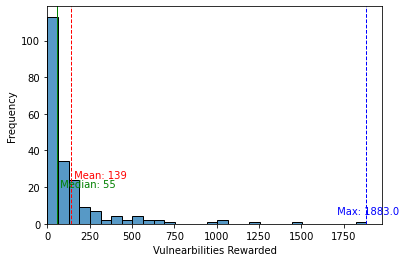

In [242]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df = drop_nan(df, df["Vulnearbilities Rewarded"])

plot_histogram(df, "Vulnearbilities Rewarded")

0 rows were dropped.
111 rows remaining.


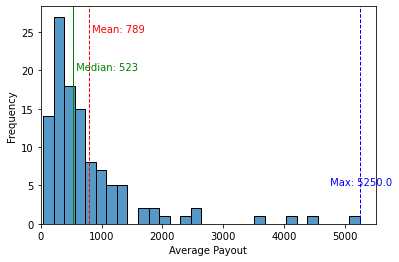

In [239]:

plot_histogram(df, "Average Payout")

## Average payout plotting

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/3818711280.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average_payout"] = df["Average_payout"].str.replace("$", "").str.replace(",", "")


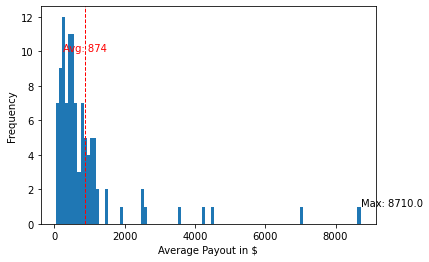

In [ ]:
# read the CSV file into a DataFrame
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")

# remove the $ sign and the comma from the Average_payout column
df["Average_payout"] = df["Average_payout"].str.replace("$", "").str.replace(",", "")






# convert the Average_payout column to a numeric data type
df["Average_payout"] = pd.to_numeric(df["Average_payout"])
avg = df["Average_payout"].mean()

max_value = df["Average_payout"].max()
# create a histogram of the Average_payout column
df["Average_payout"].plot.hist(bins=100)

# label the x and y axes
plt.xlabel("Average Payout in $")
plt.ylabel("Frequency")

plt.text(max_value, 1, "Max: " + str(max_value))

plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
plt.text(avg, 10, "Avg: " + str(int(avg)), ha="center", color="r")

# save the figure as a PNG file
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Average_payout.png")




## Num of white head hackers

Average number of hacks: 526


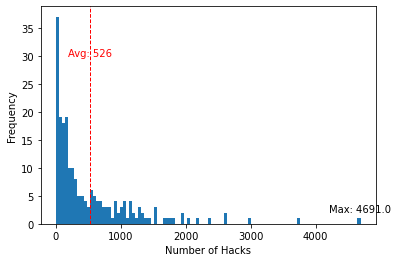

In [ ]:
# read the CSV file into a DataFrame
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")


avg = df["Num_Hacks"].mean()

# print the average
print("Average number of hacks:", int(avg))

# convert the Num_Hacks column to a numeric data type
df["Num_Hacks"] = pd.to_numeric(df["Num_Hacks"])

# create a histogram of the Num_Hacks column
df["Num_Hacks"].plot.hist(bins=100)

# add a vertical line at the location of the average
plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
max_value = df["Num_Hacks"].max()
plt.text(max_value, 2, "Max: " + str(max_value),ha="center")

plt.text(avg, 30, "Avg: " + str(int(avg)), ha="center", color="r")

# save the figure as a PNG file
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Num_hacks.png")




## Reward Average


Total count of values in the reward element column 176
Average reward in $: 3242
[2525.0, 5100.0, 1800.0, 5050.0, 5025.0, 2350.0, 10250.0, 5150.0, 1275.0, 2500.0, 662.5, 662.5, 1575.0, 3135.0, 1325.0, 1825.0, 1325.0, 2312.5, 6100.0, 5050.0, 25050.0, 5075.0, 5125.0, 10100.0, 800.0, 3100.0, 1250.0, 3050.0, 3100.0, 525.0, 5075.0, 1000.0, 1550.0, 3400.0, 3400.0, 3750.0, 2250.0, 2250.0, 1250.0, 1250.0, 2250.0, 1250.0, 1550.0, 2600.0, 1600.0, 1300.0, 12600.0, 3400.0, 3050.0, 4600.0, 3575.0, 15150.0, 2075.0, 3600.0, 1825.0, 3050.0, 3025.0, 2000.0, 2000.0, 850.0, 800.0, 1750.0, 675.0, 2600.0, 1275.0, 12625.0, 2100.0, 1325.0, 1325.0, 1575.0, 1325.0, 1800.0, 2525.0, 1325.0, 800.0, 2575.0, 2350.0, 1325.0, 800.0, 2550.0, 4250.0, 12550.0, 50000.0, 6100.0, 4800.0, 1250.0, 1550.0, 3050.0, 3050.0, 3050.0, 800.0, 1550.0, 2550.0, 1525.0, 2050.0, 2350.0, 1375.0, 1850.0, 2575.0, 4075.0, 1325.0, 1275.0, 5025.0, 2625.0, 625.0, 2500.0, 2550.0, 800.0, 5050.0, 2350.0, 3050.0, 2275.0, 1600.0, 1625.0, 1325.0, 13

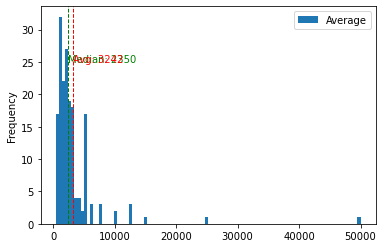

In [ ]:
import csv 
import pandas as pd
# Open the CSV file
with open("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv", 'r') as f:
  # Create a CSV reader
  reader = csv.reader(f)
  # Skip the header row
  next(reader)
  total_average = 0
  averages = []
  count = 0
  # Iterate over the rows of the CSV
  for row in reader:
    # Get the reward value from the current row
    reward_range = row[1]

    if reward_range == "":continue
    #Split the reward range on the "-" character
    if "-" in reward_range:
  # Split the string on the "-" character
      count += 1
      lower, upper = reward_range.split("-")
    else:
      # Assign the entire string to the lower variable
      lower = reward_range
      upper = None

    
    # Remove the "$" and "," characters from the strings
    lower = lower.replace("$", "").replace(",", "")
    upper = upper.replace("$", "").replace(",", "") if upper else None

    if "Points" in lower:
      lower = 0

    # Convert the strings to integers

    try :
      lower = int(lower)
      upper = int(upper) if upper else None
    except ValueError:
      print("ValueError", lower, upper)

      continue

    # Calculate the average of the lower and upper bounds
    if upper:
      average = (lower + upper) / 2
      total_average += average
      averages.append(average)
    else:
      average = lower
      total_average += average
      averages.append(average)


  print("Total count of values in the reward element column",count)  
  print("Average reward in $:", int(total_average / count))
  print(averages)
  df = pd.DataFrame(averages, columns=["Average"])
  df.plot.hist(bins=100)
  df_average = df["Average"].mean()
  df_median= df["Average"].median()
  print("this is the median",df_median)
  plt.axvline(df_median, color="g", linestyle="dashed", linewidth=1)
  plt.axvline(df_average, color="r", linestyle="dashed", linewidth=1)
  plt.text(df_median, 25, "Median: " + str(int(df_median)), color="g")
  plt.text(df_average, 25, "Avg: " + str(int(df_average)), color="r")









## Safe Habour Plotted

/Users/patrickahrend/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Safe Harbor: 111
Partial Safe Harbor: 68
Not Safe Harbor: 86


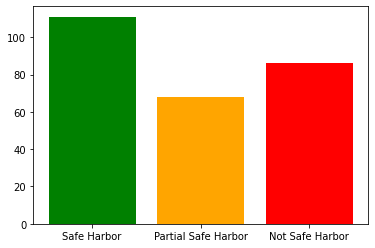

In [ ]:
# Initialize lists to store the data
safe_harbor = []
partial_safe_harbor = []
not_safe_harbor = []

# Open the CSV file
with open("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv", 'r') as f:
  # Create a CSV reader
  reader = csv.reader(f)
  
  # Iterate over the rows of the CSV
  for row in reader:
    # Get the "Is_Safe_harbor" value from the current row
    value = row[4]
    
    # Check the value and increment the appropriate list
    if value == "True":
      safe_harbor.append(1)
    elif "Partial safe harbor" in value:
      partial_safe_harbor.append(1)
    else:
      not_safe_harbor.append(1)

# Calculate the lengths of the lists
safe_harbor_count = len(safe_harbor)
print("Safe Harbor:", safe_harbor_count)
partial_safe_harbor_count = len(partial_safe_harbor)
print("Partial Safe Harbor:", partial_safe_harbor_count)
not_safe_harbor_count = len(not_safe_harbor)
print("Not Safe Harbor:", not_safe_harbor_count)

# Create the bar chart
plt.bar(["Safe Harbor", "Partial Safe Harbor", "Not Safe Harbor"], [safe_harbor_count, partial_safe_harbor_count, not_safe_harbor_count], color=["green", "orange", "red"])

# Show the chart
plt.show()


## Num hall of fame 

Text(182, 15, 'Max: 182')

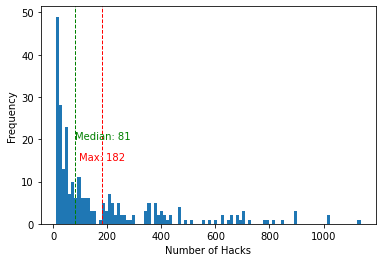

In [ ]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/Bugcrowd_industry-asc_24.12.xlsx")

df = df_new["Hall_of_famers"]
df.dropna(inplace=True)

df = df.str.replace("View the hall", "").str.replace("View all ", "")

df = pd.to_numeric(df)
# create a histogram of the Num_Hacks column
df.plot.hist(bins=100)

average = df.mean()
average = int(average)
median = int(df.median())
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
plt.axvline(median, color="g", linestyle="dashed", linewidth=1)
plt.text(median, 20, "Median: " + str(median),ha="left",color="g")
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
plt.text(average, 15, "Max: " + str(average),ha="center",color="r")






In [ ]:
df = df_new["Hall_of_famers"]
df.dropna(inplace=True)

for ele in df:
  if ele == "View the hall":
    df.replace(ele, 0, inplace=True)
    

df = pd.to_numeric(df)
# create a histogram of the Num_Hacks column
df.plot.hist(bins=100)

average = df.mean()
average = int(average)
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
plt.text(average, 15, "Max: " + str(average),ha="center",color="r")




ValueError: Unable to parse string "View all 678" at position 0

## Validation within 

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/348671543.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'Validation_within': ele}, ignore_index=True)
/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/348671543.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'Validation_within': ele}, ignore_index=True)
/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/348671543.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append({'Validation_within': ele}, ignore_index=True)
/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_50701/348671543.py:51: FutureWarning: The frame.append method is dep

Text(122, 35, 'Avg: 122')

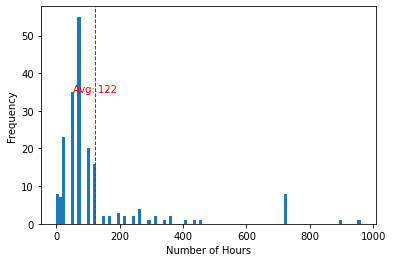

In [ ]:
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")

df = df["Validation_within"]
df.dropna(inplace=True)
df.str.replace('\n', '').str.replace('days', '')

df_final = pd.DataFrame()

for ele in df:
    if "$" in ele:
        ele = ele.replace(ele, "0")
        ele = ele.strip()
    if "days" in ele:
        ele = ele.replace("days", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24
        ele = str(ele) + " hours"
    if "day" in ele:
        ele = ele.replace("day", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24
        ele = str(ele) + " hours"
    if "about" in ele:
        ele = ele.replace("about", "")
        ele = ele.strip()
    if "month" in ele:
        ele = ele.replace("month", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24 * 30
        ele = str(ele) + " hours"
    if "minutes" in ele:
        ele = ele.replace("minutes", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 60
        ele = str(ele) + " hours"
    if "hours" in ele:
        ele = ele.replace("hours", "")
        ele = ele.strip()
    if "hour" in ele:
        ele = ele.replace("hour", "")
        ele = ele.strip()
    
    df_final = df_final.append({'Validation_within': ele}, ignore_index=True)

df_final = pd.to_numeric(df_final["Validation_within"])
df_final.plot.hist(bins=100)
average = df_final.mean()
average = int(average)
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hours")
plt.ylabel("Frequency")
plt.text(average, 35, "Avg: " + str(average),ha="center",color="r")
    





# df['Validation_within'] = df['Validation_within'].str.replace('\n', '').str.replace('days', '')
# # Extract the numerical values from the entries
# df['Validation_within'] = df['Validation_within'].str.extract('(\d+)')

# # Convert the column to numeric type
# df['Validation_within'] = pd.to_numeric(df['Validation_within'])

# for element in df['Validation_within']:
#     print(element)


# df_new = pd.DateFrame("Validation_within" , columns=["Validation_within"])
# df.dropna(inplace=True)
# print(type(df))

## Scope Target Mobile

## Scope Target Android, IOS